Epoch 1/300
362/362 [==============================] - 46s 91ms/step - loss: 0.0022
Epoch 2/300
362/362 [==============================] - 45s 125ms/step - loss: 9.1226e-04
Epoch 3/300
362/362 [==============================] - 41s 114ms/step - loss: 7.6774e-04
Epoch 4/300
362/362 [==============================] - 41s 114ms/step - loss: 6.6624e-04
Epoch 5/300
362/362 [==============================] - 35s 96ms/step - loss: 6.3485e-04
Epoch 6/300
362/362 [==============================] - 35s 96ms/step - loss: 6.1402e-04
Epoch 7/300
362/362 [==============================] - 43s 119ms/step - loss: 5.6974e-04
Epoch 8/300
362/362 [==============================] - 43s 119ms/step - loss: 4.8466e-04
Epoch 9/300
362/362 [==============================] - 45s 124ms/step - loss: 5.4449e-04
Epoch 10/300
362/362 [==============================] - 44s 121ms/step - loss: 5.0300e-04
Epoch 11/300
362/362 [==============================] - 44s 123ms/step - loss: 5.1490e-04
Epoch 12/300
362/362 [====

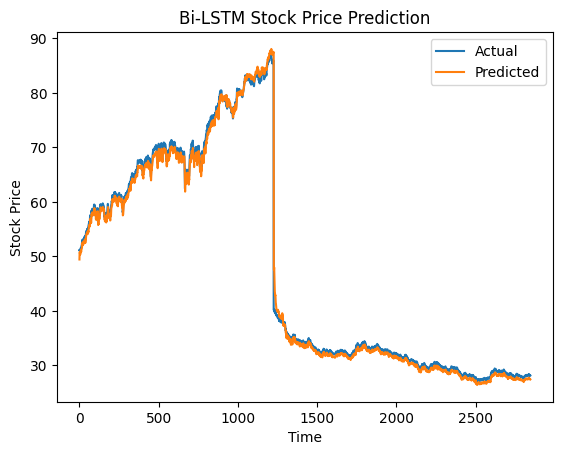

Epoch 1/300
181/181 [==============================] - 51s 216ms/step - loss: 2.4334e-04 - mae: 0.0089 - val_loss: 2676.7268 - val_mae: 47.7273
Epoch 2/300
181/181 [==============================] - 49s 268ms/step - loss: 2.6394e-04 - mae: 0.0090 - val_loss: 2676.1328 - val_mae: 47.7216
Epoch 3/300
181/181 [==============================] - 49s 269ms/step - loss: 2.5540e-04 - mae: 0.0089 - val_loss: 2676.7922 - val_mae: 47.7284
Epoch 4/300
181/181 [==============================] - 48s 267ms/step - loss: 2.4080e-04 - mae: 0.0088 - val_loss: 2676.1543 - val_mae: 47.7228
Epoch 5/300
181/181 [==============================] - 48s 263ms/step - loss: 2.6569e-04 - mae: 0.0089 - val_loss: 2676.3787 - val_mae: 47.7247
Epoch 6/300
181/181 [==============================] - 49s 269ms/step - loss: 2.6049e-04 - mae: 0.0090 - val_loss: 2676.2749 - val_mae: 47.7228
Epoch 7/300
181/181 [==============================] - 49s 269ms/step - loss: 2.5791e-04 - mae: 0.0091 - val_loss: 2676.1743 - val_mae: 

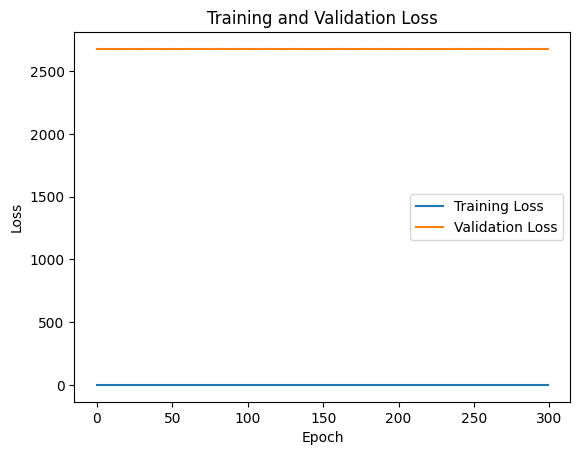

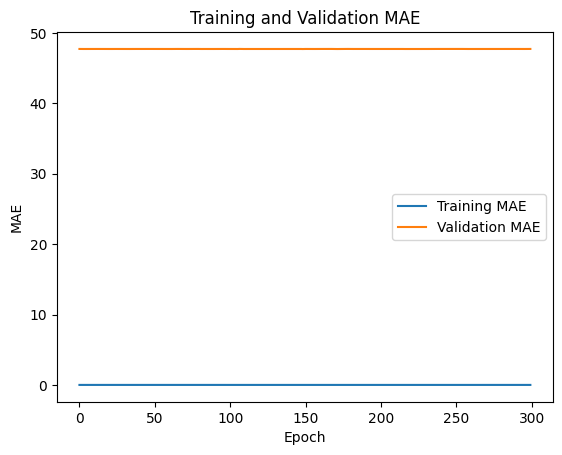

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('DATASET14k.csv')

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:len(scaled_data), :]

# Create the training and testing datasets
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=32) # IF 100 EPOCHE

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('RMSE:', rmse)

# Plot the predictions and actual values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Bi-LSTM Stock Price Prediction')
plt.legend()
plt.show()


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test)) #Then, same epoch here

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()